In [20]:
# Importing necessary libraries
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
import numpy as np
import matplotlib.pyplot as plt


In [29]:

# Function to read a FASTA file
def read_fasta_file(file_path):
    sequences = {}
    with open(file_path, "r") as f:
        sequence_id = None
        sequence = ""
        for line in f:
            line = line.strip()
            if line.startswith(">"):
                if sequence_id is not None:
                    sequences[sequence_id] = sequence
                sequence_id = line[1:]
                sequence = ""
            else:
                sequence += line
        if sequence_id is not None:
            sequences[sequence_id] = sequence
    return sequences

# Function to standardize sequences
def standardize_sequences(sequences, replacement_char='N'):
    standard_chars = set("ACGT")
    standardized_seqs = []
    for seq in sequences:
        standardized_seq = "".join([char if char in standard_chars else replacement_char for char in seq])
        standardized_seqs.append(standardized_seq)
    return standardized_seqs

# Function to encode sequences
def encode_sequences(sequences):
    label_encoder = LabelEncoder()
    label_encoder.fit(list("ACGTN"))
    encoded_seqs = []
    for seq in sequences:
        encoded_seq = label_encoder.transform(list(seq))
        encoded_seqs.append(encoded_seq)
    return encoded_seqs

# Read sequences from a FASTA file
file_path = "17 mitogenomes.fasta"
sequences_dict = read_fasta_file(file_path)
sequences = list(sequences_dict.values())

# Standardize and encode the sequences
standardized_sequences = standardize_sequences(sequences)
encoded_sequences = encode_sequences(standardized_sequences)

# Pad sequences for clustering
max_length = max([len(seq) for seq in encoded_sequences])
padded_sequences = [np.pad(seq, (0, max_length - len(seq)), 'constant') for seq in encoded_sequences]

# Perform KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_clusters = kmeans.fit_predict(padded_sequences)




C:\Users\User\tensor\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


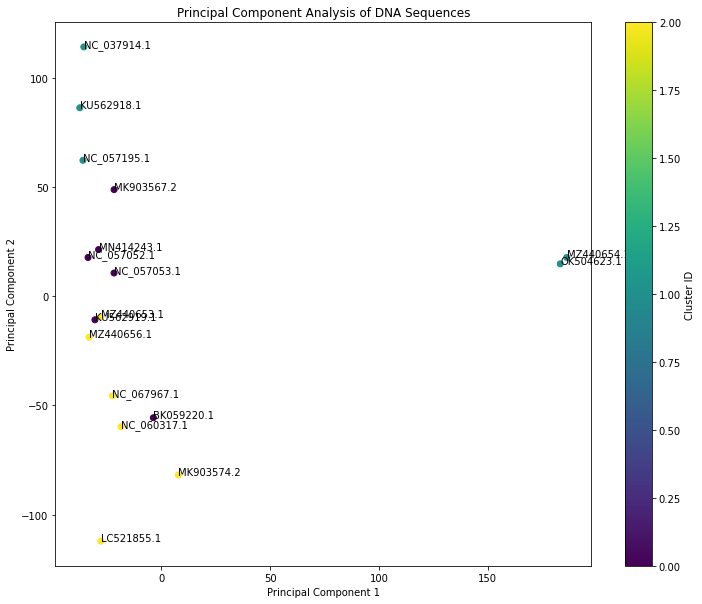

In [31]:
# Perform PCA for visualization
pca = PCA(n_components=2)
principal_components = pca.fit_transform(padded_sequences)
pc1 = principal_components[:, 0]
pc2 = principal_components[:, 1]

# Generate PCA plot
plt.figure(figsize=(12, 10))
scatter = plt.scatter(pc1, pc2, c=kmeans_clusters, cmap='viridis')
plt.title('Principal Component Analysis of DNA Sequences')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(scatter, label='Cluster ID')

# Annotate all points with sequence IDs
sequence_ids = list(sequences_dict.keys())
for i, txt in enumerate(sequence_ids):
    plt.annotate(txt.split()[0], (pc1[i], pc2[i]))
plt.show()


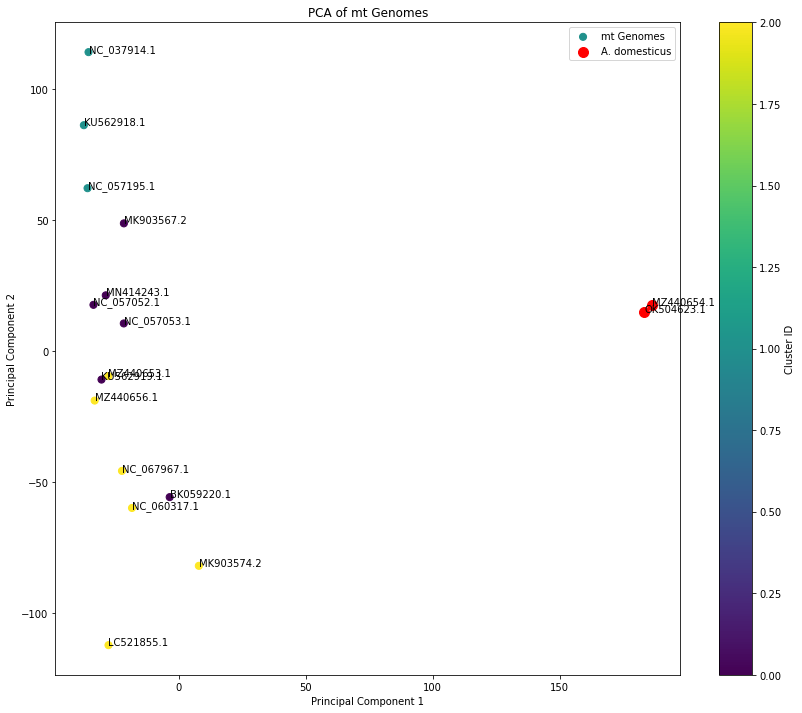

['OK504623.1 Acheta domesticus breed Farm mitochondrion, complete genome',
 'MZ440654.1 Acheta domesticus mitochondrion, complete genome']

In [46]:
# Generate PCA plot with all sequence labels annotated and identify potential outliers

# Calculate the centroid of the PCA plot to identify outliers
centroid_x = np.mean(pc1)
centroid_y = np.mean(pc2)

# Calculate the distance of each point from the centroid
distances_from_centroid = np.sqrt((pc1 - centroid_x)**2 + (pc2 - centroid_y)**2)

# Identify potential outliers as points that are more than 1.5 times the Interquartile Range (IQR) away from the centroid
IQR = np.percentile(distances_from_centroid, 75) - np.percentile(distances_from_centroid, 25)
outlier_threshold = np.percentile(distances_from_centroid, 75) + 1.5 * IQR
outliers = np.where(distances_from_centroid > outlier_threshold)[0]

# Plot PCA with all sequences labeled and outliers emphasized
plt.figure(figsize=(14, 12))
scatter = plt.scatter(pc1, pc2, c=kmeans_clusters, cmap='viridis', s=50, label='mt Genomes')
plt.scatter(pc1[outliers], pc2[outliers], c='red', s=100, label='A. domesticus')
plt.title('PCA of mt Genomes')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(scatter, label='Cluster ID')

# Annotate all points with sequence IDs
for i, txt in enumerate(sequence_ids):
    plt.annotate(txt.split()[0], (pc1[i], pc2[i]))

plt.legend()
plt.show()

# Return the IDs of the sequences identified as outliers
outlier_ids = [sequence_ids[i] for i in outliers]
outlier_ids


C:\Users\User\tensor\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


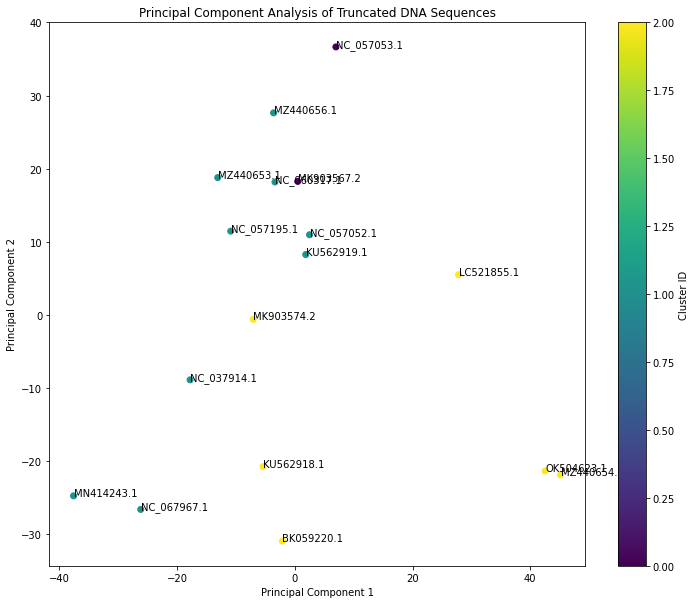

In [42]:


# Function to read a FASTA file
def read_fasta_file(file_path):
    sequences = {}
    with open(file_path, "r") as f:
        sequence_id = None
        sequence = ""
        for line in f:
            line = line.strip()
            if line.startswith(">"):
                if sequence_id is not None:
                    sequences[sequence_id] = sequence
                sequence_id = line[1:]
                sequence = ""
            else:
                sequence += line
        if sequence_id is not None:
            sequences[sequence_id] = sequence
    return sequences

# Function to standardize sequences
def standardize_sequences(sequences, replacement_char='N'):
    standard_chars = set("ACGT")
    standardized_seqs = []
    for seq in sequences:
        standardized_seq = "".join([char if char in standard_chars else replacement_char for char in seq])
        standardized_seqs.append(standardized_seq)
    return standardized_seqs

# Function to encode sequences
def encode_sequences(sequences):
    label_encoder = LabelEncoder()
    label_encoder.fit(list("ACGTN"))
    encoded_seqs = []
    for seq in sequences:
        encoded_seq = label_encoder.transform(list(seq))
        encoded_seqs.append(encoded_seq)
    return encoded_seqs

# Read sequences from the uploaded FASTA file
file_path = "17 mitogenomes.fasta"
sequences_dict = read_fasta_file(file_path)
sequences = list(sequences_dict.values())
sequence_ids = list(sequences_dict.keys())

# Truncate the sequences to include only the last 1000 bp (D-loop region)
truncated_sequences = [seq[-2000:] for seq in sequences]

# Standardize and encode the truncated sequences
standardized_truncated_sequences = standardize_sequences(truncated_sequences)
encoded_truncated_sequences = encode_sequences(standardized_truncated_sequences)

# Pad truncated sequences for clustering
max_length_truncated = max([len(seq) for seq in encoded_truncated_sequences])
padded_truncated_sequences = [np.pad(seq, (0, max_length_truncated - len(seq)), 'constant') for seq in encoded_truncated_sequences]

# Perform KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_clusters_truncated = kmeans.fit_predict(padded_truncated_sequences)

# Perform PCA for visualization
pca = PCA(n_components=2)
principal_components_truncated = pca.fit_transform(padded_truncated_sequences)
pc1_truncated = principal_components_truncated[:, 0]
pc2_truncated = principal_components_truncated[:, 1]

# Generate PCA plot
plt.figure(figsize=(12, 10))
scatter = plt.scatter(pc1_truncated, pc2_truncated, c=kmeans_clusters_truncated, cmap='viridis')
plt.title('Principal Component Analysis of Truncated DNA Sequences')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(scatter, label='Cluster ID')

# Annotate all points with sequence IDs
for i, txt in enumerate(sequence_ids):
    plt.annotate(txt.split()[0], (pc1_truncated[i], pc2_truncated[i]))
plt.show()
